<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'lxml')

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [86]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [2]:
# manipule os dados
# continue o codigo aqui

estados_conteudo = []
for linha in fonte.find_all('nome'):
  conteudo = linha.get_text().strip().split('\n')
  estados_conteudo.append(conteudo[0])


sigla_conteudo = []
for linha in fonte.find_all('sigla'):
  conteudo = linha.get_text().strip().split('\n')
  sigla_conteudo.append(conteudo[0])


regiao_conteudo = []
for linha in fonte.find_all('regiao'):
  conteudo = linha.get_text().strip().split('\n')
  regiao_conteudo.append(conteudo[0])

In [7]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui
import csv

header = ['estado', 'sigla', 'regiao']

with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as fp:
  escritor_csv = csv.writer(fp, delimiter=';')
  escritor_csv.writerows([header] + list(map(lambda estado, sigla, regiao : [estado, sigla, regiao], estados_conteudo, sigla_conteudo, regiao_conteudo)))

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [20]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

# continue o codigo aqui
cidades_df = pd.read_csv('cidades-bruto.csv', sep=',')

In [21]:
# visualize os resultados
print(cidades_df.head())

                                               FID   gid                 UF  \
0  vw_pib_percapita.fid-4514e25a_17aaa325034_-258f   215              BAHIA   
1  vw_pib_percapita.fid-4514e25a_17aaa325034_-258e   306  RIO GRANDE DO SUL   
2  vw_pib_percapita.fid-4514e25a_17aaa325034_-258d   900     ESPIRITO SANTO   
3  vw_pib_percapita.fid-4514e25a_17aaa325034_-258c  3613       MINAS GERAIS   
4  vw_pib_percapita.fid-4514e25a_17aaa325034_-258b  1028              PIAUÍ   

        nome   Censo           PIB  Pop_est_2009  PIB_percapita  \
0   Tremedal  2010.0  5.788399e+04         18433    3140.239990   
1     Turuçu  2010.0  4.572388e+04          4000   11430.969727   
2    Vitória  2010.0  1.978263e+07        320156   61790.589844   
3  Jacutinga  2010.0  2.478160e+05         21424   11567.209961   
4    Nazária  2010.0  2.095138e+04          7895    2653.750000   

                          Descrição               legenda  classe  \
0  Produto Interno Bruto per capita             - 963

In [22]:
# Filtrar apenas dados do censo de 2010:
cidades_df_2010 = cidades_df.loc[cidades_df['Censo'] == 2010.0]
print(cidades_df_2010.head())

                                               FID   gid                 UF  \
0  vw_pib_percapita.fid-4514e25a_17aaa325034_-258f   215              BAHIA   
1  vw_pib_percapita.fid-4514e25a_17aaa325034_-258e   306  RIO GRANDE DO SUL   
2  vw_pib_percapita.fid-4514e25a_17aaa325034_-258d   900     ESPIRITO SANTO   
3  vw_pib_percapita.fid-4514e25a_17aaa325034_-258c  3613       MINAS GERAIS   
4  vw_pib_percapita.fid-4514e25a_17aaa325034_-258b  1028              PIAUÍ   

        nome   Censo           PIB  Pop_est_2009  PIB_percapita  \
0   Tremedal  2010.0  5.788399e+04         18433    3140.239990   
1     Turuçu  2010.0  4.572388e+04          4000   11430.969727   
2    Vitória  2010.0  1.978263e+07        320156   61790.589844   
3  Jacutinga  2010.0  2.478160e+05         21424   11567.209961   
4    Nazária  2010.0  2.095138e+04          7895    2653.750000   

                          Descrição               legenda  classe  \
0  Produto Interno Bruto per capita             - 963

In [23]:
# continue o codigo aqui

# Colunas selecionadas:
colunas_selecionadas = ['UF', 'nome', 'Pop_est_2009', 'PIB',  'PIB_percapita']

# Selecionar as colunas desejadas no DataFrame filtrado:
dados_selecionados = cidades_df_2010[colunas_selecionadas]

# Verificamos se temos algum resultado nulo:
dados_selecionados.isnull().any()
print(dados_selecionados)

                     UF              nome  Pop_est_2009           PIB  \
0                 BAHIA          Tremedal         18433  5.788399e+04   
1     RIO GRANDE DO SUL            Turuçu          4000  4.572388e+04   
2        ESPIRITO SANTO           Vitória        320156  1.978263e+07   
3          MINAS GERAIS         Jacutinga         21424  2.478160e+05   
4                 PIAUÍ           Nazária          7895  2.095138e+04   
...                 ...               ...           ...           ...   
5561     SANTA CATARINA         Campo Erê          9737  1.876289e+05   
5562             PARANÁ          Planalto         13983  1.385535e+05   
5563          SÃO PAULO        Guararapes         29639  5.320191e+05   
5564  RIO GRANDE DO SUL  Barra do Guarita          3067  2.198064e+04   
5565  RIO GRANDE DO SUL        Machadinho          5623  5.715017e+04   

      PIB_percapita  
0       3140.239990  
1      11430.969727  
2      61790.589844  
3      11567.209961  
4       2653.

In [24]:
# Escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui
novo_header = ['estado', 'cidade', 'populacao', 'pib', 'pib_percapita']

# Mudança do cabecalho do DataFrame para o novo header:
dados_selecionados.columns = novo_header

dados_selecionados.to_csv('cidades-limpo.csv', sep=';', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [37]:
# solução do exercício 1.3
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from unidecode import unidecode

# DataFrames
estados_limpo_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_limpo_df = pd.read_csv('cidades-limpo.csv', sep=';')

# Função para remover a acentuação e padronizar os valores
def padronizar_estados(df, coluna):
    df[coluna] = df[coluna].apply(lambda x: unidecode(str(x)))
    return df

# Padronizar DataFrames
df1 = padronizar_estados(estados_limpo_df, 'estado')
df2 = padronizar_estados(cidades_limpo_df, 'estado')

# Exibir os DataFrames padronizados
print(df1)
print(df2)


In [39]:
# Combinar os DataFrames padronizados
brasil = pd.merge(left=df1, right=df2, on='estado' , how='inner')

# Conferir se temos algum valor nulo:
brasil.isnull().any()

In [ ]:
# Salvar csv:
brasil.to_csv('brasil.csv', sep=';', index=False)

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [40]:
# solução do exercício 2.1
import pandas as pd

brasil_df = pd.read_csv('brasil.csv', sep=';')

In [41]:
brasil_df

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,3015,1.600776e+04,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,12504,4.681494e+05,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,23627,2.886858e+05,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,128572,1.335420e+06,10386.549805


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [59]:
# código para responder a pergunta
brasil_df.sort_values(by=['populacao'], ascending=False).head(n=10)

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
4403,SAO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688
2747,RIO DE JANEIRO,RJ,SUDESTE,Rio de Janeiro,6186710,175739344.0,28405.949219
246,BAHIA,BA,NORDESTE,Salvador,2998056,32824228.0,10948.500000
802,DISTRITO FEDERAL,DF,CENTRO-OESTE,Brasília,2606885,131487264.0,50438.460938
766,CEARA,CE,NORDESTE,Fortaleza,2505552,31789186.0,12687.500000
5447,MINAS GERAIS,MG,SUDESTE,Belo Horizonte,2452617,44595204.0,18182.699219
2056,PARANA,PR,SUL,Curitiba,1851215,45762420.0,24720.210938
142,AMAZONAS,AM,NORTE,Manaus,1738641,40486108.0,23286.060547
2446,PERNAMBUCO,PE,NORDESTE,Recife,1561659,24835340.0,15903.179688
1687,PARA,PA,NORTE,Belém,1437600,16526989.0,11496.240234


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [43]:
# código para responder a pergunta
nordeste_df = brasil_df.loc[brasil_df['regiao'] == 'NORDESTE']
nordeste_df.sort_values(by=['pib_percapita']).head()


,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
1319,MARANHAO,MA,NORDESTE,São Vicente Ferrer,20463,39492.960938,1929.969971
1214,MARANHAO,MA,NORDESTE,Cajapió,10337,22781.035156,2203.830078
2512,PIAUI,PI,NORDESTE,Dom Inocêncio,10795,25457.230469,2358.239990
1338,MARANHAO,MA,NORDESTE,Timbiras,26909,63724.851562,2368.159912
1235,MARANHAO,MA,NORDESTE,Axixá,15203,36745.226562,2416.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [45]:
# código para responder a pergunta
sao_paulo_dt = brasil_df.loc[brasil_df['estado'] == 'SAO PAULO']
sao_paulo_dt.sort_values(by=['pib'], ascending=False).head(15)

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
4403,SAO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688
4355,SAO PAULO,SP,SUDESTE,Guarulhos,1299283,32473828.0,24993.650391
4472,SAO PAULO,SP,SUDESTE,Campinas,1064669,31654720.0,29731.980469
4238,SAO PAULO,SP,SUDESTE,Osasco,718646,31616452.0,43994.468750
3942,SAO PAULO,SP,SUDESTE,São Bernardo do Campo,810979,28935768.0,35680.050781
4476,SAO PAULO,SP,SUDESTE,Barueri,270173,26908070.0,99595.703125
3900,SAO PAULO,SP,SUDESTE,Santos,417098,22546134.0,54054.761719
4126,SAO PAULO,SP,SUDESTE,São José dos Campos,615871,22018042.0,35751.058594
4146,SAO PAULO,SP,SUDESTE,Jundiaí,349929,16585137.0,47395.718750
3948,SAO PAULO,SP,SUDESTE,Santo André,673396,14709603.0,21843.910156


 - Qual é o PIB do estado de Santa Catarina?

In [49]:
# código para responder a pergunta
sc_df = brasil_df.loc[brasil_df['estado'] == 'SANTA CATARINA']
soma_pib_sc = sc_df['pib'].sum()
print(soma_pib_sc)

129806256.75195317


 - Qual é o população da região sul?

In [50]:
# código para responder a pergunta
sul_df = brasil_df.loc[brasil_df['regiao'] == 'SUL']
populacao_sul = sul_df['populacao'].sum()
print(populacao_sul)

27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [51]:
# código para responder a pergunta
cidades_ms_df = brasil_df.loc[brasil_df['sigla'] == 'MS']
pib_per_capt_ms = cidades_ms_df['pib_percapita'].agg('mean')
print(pib_per_capt_ms)

14458.896859975644


 - Qual é a população do Brasil?

In [58]:
# código para responder a pergunta
soma_populacao_br = brasil_df['populacao'].sum()
print(soma_populacao_br)

191176146


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

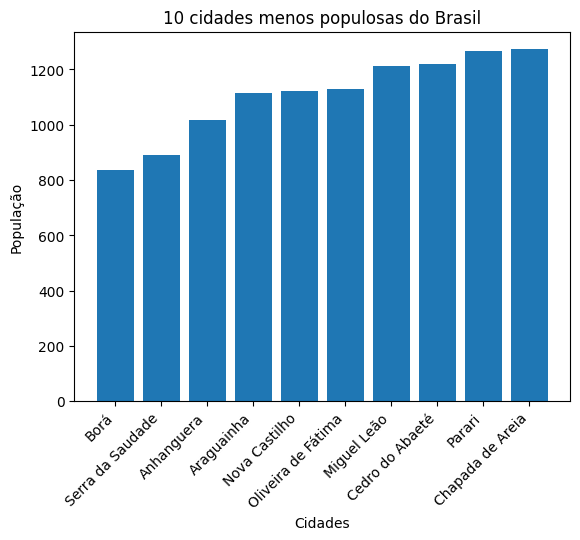

In [61]:
# código para gerar a visualização
import matplotlib.pyplot as plt

cidades_menor_populacao = brasil_df.sort_values(by=['populacao']).head(n=10)

plt.bar(cidades_menor_populacao['cidade'], cidades_menor_populacao['populacao'])

# Rótulos do gráfico
plt.xlabel('Cidades')
plt.ylabel('População')
plt.title('10 cidades menos populosas do Brasil')

# Ajustar o tamanho dos rótulos no eixo x
plt.xticks(rotation=45, ha='right', fontsize=10)  # 45 graus e alinhamento à direita

# Exibir gráfico
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='populacao'>

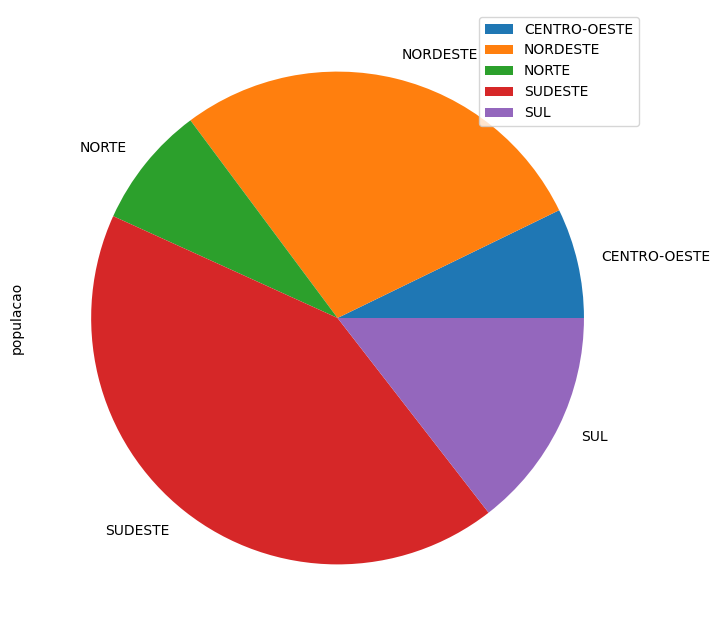

In [85]:
# código para gerar a visualização
brasil_df[['regiao', 'populacao']].groupby('regiao').agg('sum').plot.pie(y='populacao', figsize=(9,8))